# Market Segmentation

The **goal** of this project is to analyze transactional data and based on them to perform a market segmentation. For this purpose, the *K-Means* algorithm is being used as a clustering method.

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

## Get the data

For this project, i'll be using a dataset from [Kaggle](https://www.kaggle.com/datasets/mysarahmadbhat/customersegmentation).

The dataset contains transactional data for a UK-based, online retail company.<br>

The company mainly sells unique all-occasion gifts, whereas many of its customers are wholesalers from all over the world.

In [2]:
transactions = pd.read_csv('data/Online Retail.csv')
transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


## EDA

In [3]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
transactions['Total Price'] = transactions['Quantity'] * transactions['UnitPrice'] #create a new column
transactions['InvoiceDate'] = pd.to_datetime(transactions['InvoiceDate'])

In [5]:
transactions.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [6]:
transactions.describe()

,Quantity,UnitPrice,CustomerID,Total Price
count,541909.000000,541909.000000,406829.000000,541909.000000
mean,9.552250,4.611114,15287.690570,17.987795
std,218.081158,96.759853,1713.600303,378.810824
min,-80995.000000,-11062.060000,12346.000000,-168469.600000
25%,1.000000,1.250000,13953.000000,3.400000
50%,3.000000,2.080000,15152.000000,9.750000
75%,10.000000,4.130000,16791.000000,17.400000
max,80995.000000,38970.000000,18287.000000,168469.600000


* Which customers make the most transactions?

Text(0, 0.5, 'Number of Invoices')

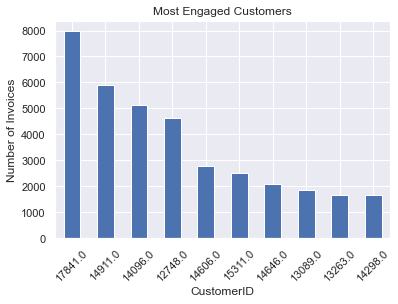

In [7]:
transactions.groupby('CustomerID').agg({'InvoiceNo': 'count'}).sort_values('InvoiceNo',ascending=False).head(10).plot(kind='bar',legend=False)
plt.title('Most Engaged Customers')
plt.xticks(rotation=45)
plt.ylabel('Number of Invoices')

* Which customers spend the most money?

Text(0, 0.5, 'Total Amount Spent')

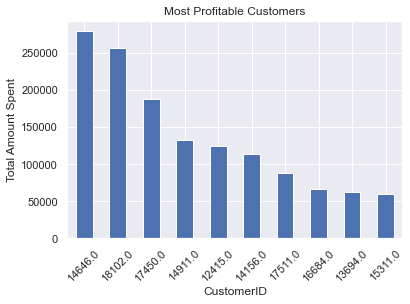

In [8]:
transactions.groupby('CustomerID').agg({'Total Price': 'sum'}).sort_values('Total Price', ascending=False).head(10).plot(kind='bar',legend=False)
plt.title('Most Profitable Customers')
plt.xticks(rotation=45)
plt.ylabel('Total Amount Spent')

* Which are the most profitable products of the best customer?

In [9]:
transactions[transactions['CustomerID'] == 14646.0].groupby('Description').agg({'Quantity':'sum','Total Price': 'sum'}).sort_values('Total Price', ascending=False).head(10)

,Quantity,Total Price
Description,,
RABBIT NIGHT LIGHT,4801,9568.48
ROUND SNACK BOXES SET OF4 WOODLAND,3120,7956.00
SPACEBOY LUNCH BOX,4492,7415.40
DOLLY GIRL LUNCH BOX,4096,6758.40
ROUND SNACK BOXES SET OF 4 FRUITS,1584,4039.20
JUMBO BAG RED RETROSPOT,2000,3468.00
RED TOADSTOOL LED NIGHT LIGHT,2376,3459.60
REGENCY CAKESTAND 3 TIER,288,3153.60
5 HOOK HANGER RED MAGIC TOADSTOOL,2016,2923.20


* Which countries spend the most money, on average?

In [10]:
avg_spend_per_country = transactions.groupby('Country').agg({'Total Price': 'median'}).sort_values('Total Price', ascending=False).head(10)

<AxesSubplot:xlabel='Total Price', ylabel='Country'>

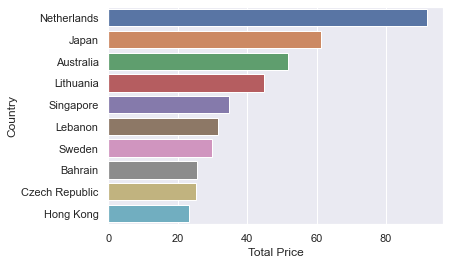

In [11]:
sns.barplot(x=avg_spend_per_country['Total Price'],y=avg_spend_per_country.index)

* Which products are producing the most revenues, per country?

In [12]:
# apply 2 groupby in order to get only the top 10 products per country
top_products_per_country = transactions.groupby(['Country','Description']).agg({'Total Price': 'sum'}).sort_values(['Country','Total Price'], ascending=[True,False]).groupby(level=0).head(10)
top_products_per_country

Total Price
Country     Description                                   
Australia   RABBIT NIGHT LIGHT                     3375.84
            SET OF 6 SPICE TINS PANTRY DESIGN      2082.00
            RED TOADSTOOL LED NIGHT LIGHT          1987.20
            SET OF 3 CAKE TINS PANTRY DESIGN       1978.25
            REGENCY CAKESTAND 3 TIER               1978.20
...                                                    ...
Unspecified ASSTD DESIGN RACING CAR PEN              54.08
            BINGO SET                                52.50
            SET OF 2 WOODEN MARKET CRATES            51.00
            PLASTERS IN TIN STRONGMAN                49.50
            TRADITIONAL WOODEN SKIPPING ROPE         47.85

[379 rows x 1 columns]

* Which products are being purchased more frequently, per country?

In [13]:
most_frequently_products_per_country = transactions.groupby(['Country','Description']).agg({'Quantity': 'sum'}).sort_values(['Country','Quantity'], ascending=[True,False]).groupby(level=0).head(10)
most_frequently_products_per_country[:20]

Quantity
Country   Description                                  
Australia MINI PAINT SET VINTAGE                   2916
          RABBIT NIGHT LIGHT                       1884
          RED  HARMONICA IN BOX                    1704
          RED TOADSTOOL LED NIGHT LIGHT            1344
          DOLLY GIRL LUNCH BOX                     1024
          HOMEMADE JAM SCENTED CANDLES              994
          SPACEBOY LUNCH BOX                        960
          BLUE HARMONICA IN BOX                     720
          MINI JIGSAW SPACEBOY                      720
          4 TRADITIONAL SPINNING TOPS               700
Austria   SET 12 KIDS COLOUR  CHALK STICKS          288
          MINI JIGSAW PURDEY                        240
          PACK OF 6 PANNETONE GIFT BOXES            144
          PACK OF 6 SWEETIE GIFT BOXES              144
          12 PENCILS SMALL TUBE RED RETROSPOT        48
          ANGEL DECORATION 3 BUTTONS                 48
          KIDS RAIN MAC BLUE                         48
          KIDS RAIN MAC PINK                         48
          PACK OF 60 PINK PAISLEY CAKE CASES         48
          PARTY CONES CANDY ASSORTED                 48

#### EDA for the cancellations

In [14]:
# If the code starts with letter 'C', it indicates a cancellation.
cancellations = transactions[transactions['InvoiceNo'].str.startswith('C')]
cancellations

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Total Price
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom,-27.50
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom,-4.65
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom,-19.80
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom,-6.96
...,...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,2011-12-09 09:57:00,0.83,14397.0,United Kingdom,-9.13
541541,C581499,M,Manual,-1,2011-12-09 10:28:00,224.69,15498.0,United Kingdom,-224.69
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,2011-12-09 11:57:00,10.95,15311.0,United Kingdom,-54.75
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,2011-12-09 11:58:00,1.25,17315.0,United Kingdom,-1.25


* Which customers make the most cancellations?

Text(0, 0.5, 'Number of Cancellations')

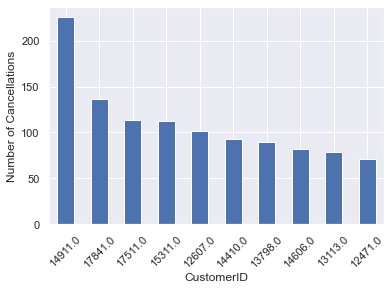

In [15]:
cancellations.groupby('CustomerID').agg({'InvoiceNo': 'count'}).sort_values('InvoiceNo',ascending=False).head(10).plot(kind='bar',legend=False)
plt.xticks(rotation=45)
plt.ylabel('Number of Cancellations')

* Which are the highest  cancellations per customer?

Text(0, 0.5, 'Total Amount of Cancellations')

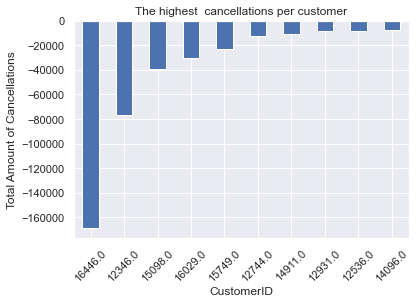

In [16]:
cancellations.groupby('CustomerID').agg({'Total Price': 'sum'}).sort_values('Total Price').head(10).plot(kind='bar',legend=False)
plt.title('The highest  cancellations per customer')
plt.xticks(rotation=45)
plt.ylabel('Total Amount of Cancellations')

* Which countries make the most cancellations?

Text(0.5, 0, 'Number of Cancellations')

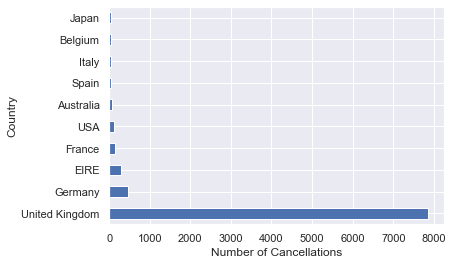

In [17]:
cancellations.groupby('Country').agg({'InvoiceNo': 'count'}).sort_values('InvoiceNo',ascending=False).head(10).plot(kind='barh',legend=False)
plt.xlabel('Number of Cancellations')

* Which are the biggest cancellations per country?

In [18]:
cancellations.groupby('Country').agg({'Total Price': 'sum'}).sort_values('Total Price').head(10)

,Total Price
Country,
United Kingdom,-815291.60
EIRE,-20177.14
France,-12311.21
Singapore,-12158.90
Germany,-7168.93
Spain,-6802.53
Hong Kong,-5574.76
Portugal,-4380.08
Japan,-2075.75


* Which are the most frequently cancelled products?

Text(0.5, 0, 'Number of Cancellations')

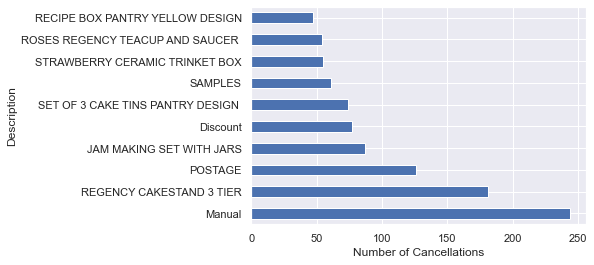

In [19]:
cancellations.groupby('Description').agg({'InvoiceNo': 'count'}).sort_values('InvoiceNo',ascending=False).head(10).plot(kind='barh',legend=False)
plt.xlabel('Number of Cancellations')

* Which are the highest cancellations per product?

Text(0.5, 0, 'Total Amount of Cancellations')

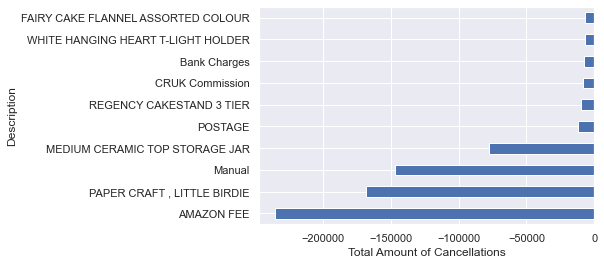

In [20]:
cancellations.groupby('Description').agg({'Total Price': 'sum'}).sort_values('Total Price').head(10).plot(kind='barh',legend=False)
plt.xlabel('Total Amount of Cancellations')

#### EDA for the time series data

In [21]:
transactions['Month'] = transactions['InvoiceDate'].dt.month
transactions['Day of Week'] = transactions.InvoiceDate.dt.strftime('%A')
transactions['Date'] = transactions.InvoiceDate.dt.date

In [22]:
transactions['Day of Week'].value_counts() # Saturday is not present

Thursday     103857
Tuesday      101808
Monday        95111
Wednesday     94565
Friday        82193
Sunday        64375
Name: Day of Week, dtype: int64

As we can see the majority of the transactions are made on 'Thursday' and 'Tuesday'.

In [23]:
transactions['Month'].value_counts()

11    84711
12    68006
10    60742
9     50226
7     39518
5     37030
6     36874
3     36748
8     35284
1     35147
4     29916
2     27707
Name: Month, dtype: int64

It seems that the majority of the transactions are made at the end of the year.

In [24]:
transactions[transactions['InvoiceDate'].dt.year == 2010]['Month'].value_counts() # From the above transactions of 'December', 42481 of them were made in 2010. 

12    42481
Name: Month, dtype: int64

* Which is the evolution of revenue over time?

In [25]:
grouped_by_date = transactions.groupby('Date').agg({'Total Price': 'sum'})

<AxesSubplot:xlabel='Date', ylabel='Total Price'>

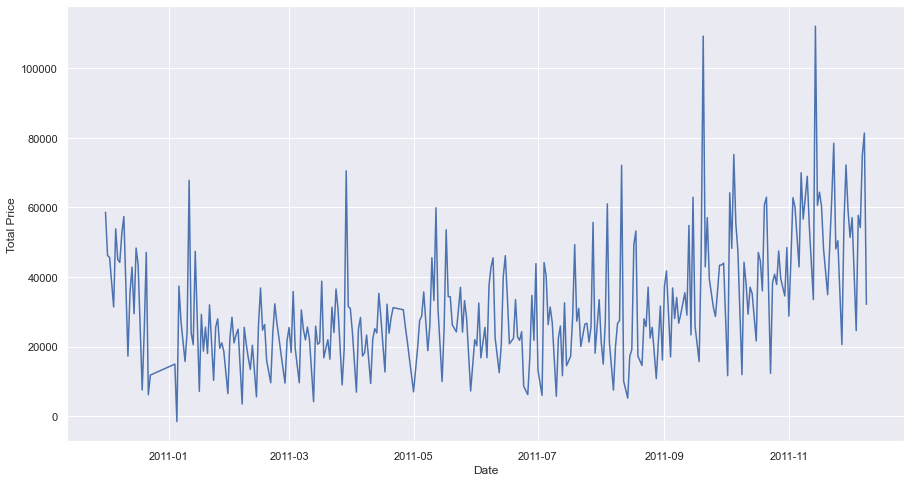

In [26]:
plt.figure(figsize=(15,8))
sns.lineplot(x=grouped_by_date.index, y=grouped_by_date['Total Price'], data=grouped_by_date)

* Which is the evolution of the number of transactions over time?

In [27]:
transactions_over_time = transactions.groupby('Date').agg({'InvoiceNo': 'count'})

<AxesSubplot:xlabel='Date', ylabel='InvoiceNo'>

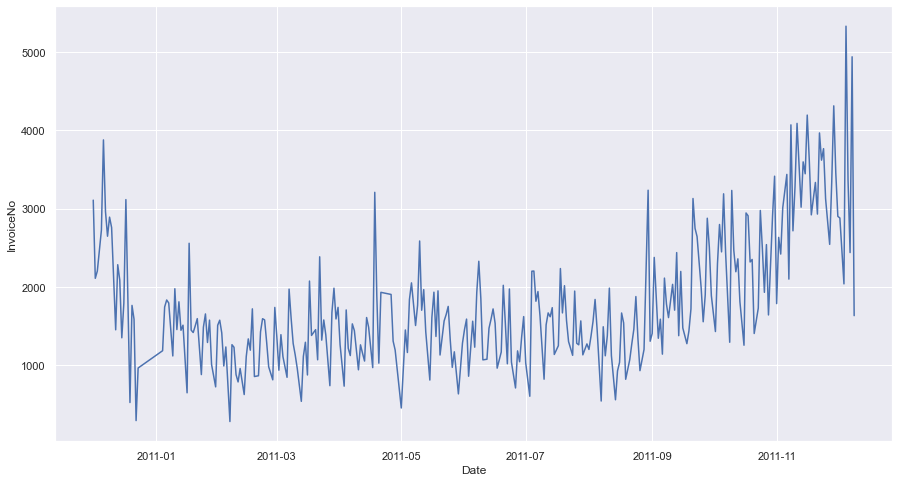

In [28]:
plt.figure(figsize=(15,8))
sns.lineplot(x=transactions_over_time.index, y=transactions_over_time['InvoiceNo'], data=transactions_over_time)

Again, we can see that there is an increase of transactions at the end of the year.

* Which is the evolution of the Total Cancellation Amount?

In [29]:
cancellations['Date'] = cancellations.InvoiceDate.dt.date

<ipython-input-29-281444aa1129>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cancellations['Date'] = cancellations.InvoiceDate.dt.date


In [30]:
grouped_cancellations_by_date = cancellations.groupby('Date').agg({'Total Price': 'sum'})


Text(0, 0.5, 'Total Cancellation Amount')

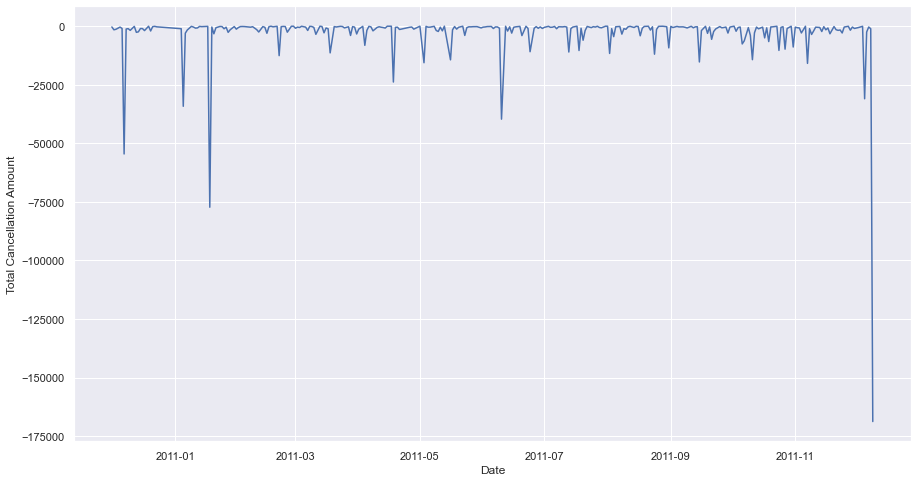

In [31]:
plt.figure(figsize=(15,8))
sns.lineplot(x=grouped_cancellations_by_date.index, y=grouped_cancellations_by_date['Total Price'], data=grouped_cancellations_by_date)
plt.ylabel('Total Cancellation Amount')

* Which is the average revenue per day of week?

In [32]:
transactions.groupby('Day of Week').agg({'Total Price': 'median'}).sort_values('Total Price', ascending=False)

,Total Price
Day of Week,
Thursday,10.50
Friday,10.08
Wednesday,9.95
Tuesday,9.12
Monday,8.50
Sunday,6.30


As we can the best day is *Thursday*

* Which is the total revenue per Month?

In [33]:
transactions.groupby('Month').agg({'Total Price': 'sum'}).sort_values('Total Price', ascending=False)

,Total Price
Month,
11,1461756.250
12,1182625.030
10,1070704.670
9,1019687.622
5,723333.510
6,691123.120
3,683267.080
8,682680.510
7,681300.111


It seems that the highest revenues are being obtained during the last months.

* Which is the evolution of revenues per Country?

In [34]:
grouped_by_country = pd.pivot_table(transactions,index=['Date'],columns=['Country'],values=['Total Price'],aggfunc=np.sum,fill_value=0,margins=True)
grouped_by_country

Total Price                                               \
Country      Australia   Austria Bahrain   Belgium  Brazil   Canada   
Date                                                                  
2010-12-01      358.25      0.00     0.0      0.00     0.0     0.00   
2010-12-02        0.00      0.00     0.0      0.00     0.0     0.00   
2010-12-03        0.00      0.00     0.0    346.10     0.0     0.00   
2010-12-05        0.00      0.00     0.0      0.00     0.0     0.00   
2010-12-06        0.00      0.00     0.0      0.00     0.0     0.00   
...                ...       ...     ...       ...     ...      ...   
2011-12-06        0.00      0.00     0.0    898.77     0.0     0.00   
2011-12-07        0.00      0.00     0.0      0.00     0.0     0.00   
2011-12-08        0.00    683.20     0.0      0.00     0.0     0.00   
2011-12-09        0.00      0.00     0.0    208.64     0.0     0.00   
All          137077.27  10154.32   548.4  40910.96  1143.6  3666.38   

                                                               ...  \
Country    Channel Islands    Cyprus Czech Republic   Denmark  ...   
Date                                                           ...   
2010-12-01            0.00      0.00           0.00      0.00  ...   
2010-12-02            0.00      0.00           0.00      0.00  ...   
2010-12-03            0.00      0.00           0.00      0.00  ...   
2010-12-05            0.00      0.00           0.00      0.00  ...   
2010-12-06            0.00      0.00           0.00      0.00  ...   
...                    ...       ...            ...       ...  ...   
2011-12-06            0.00      0.00           0.00      0.00  ...   
2011-12-07            0.00      0.00           0.00      0.00  ...   
2011-12-08           -4.25      0.00           0.00      0.00  ...   
2011-12-09            0.00      0.00           0.00      0.00  ...   
All               20086.29  12946.29         707.72  18768.14  ...   

                                                                            \
Country    Saudi Arabia Singapore     Spain    Sweden Switzerland      USA   
Date                                                                         
2010-12-01         0.00      0.00      0.00      0.00        0.00     0.00   
2010-12-02         0.00      0.00      0.00      0.00        0.00     0.00   
2010-12-03         0.00      0.00    620.00      0.00      303.40     0.00   
2010-12-05         0.00      0.00      0.00      0.00        0.00     0.00   
2010-12-06         0.00      0.00      0.00      0.00        0.00     0.00   
...                 ...       ...       ...       ...         ...      ...   
2011-12-06         0.00      0.00    172.06      0.00        0.00     0.00   
2011-12-07         0.00      0.00     99.37      0.00        0.00     0.00   
2011-12-08         0.00      0.00      0.00      0.00        0.00  -269.96   
2011-12-09         0.00      0.00      0.00      0.00        0.00     0.00   
All              131.17   9120.39  54774.58  36595.91    56385.35  1730.92   

                                                                         
Country    United Arab Emirates United Kingdom Unspecified          All  
Date                                                                     
2010-12-01                 0.00   5.461515e+04        0.00    58635.560  
2010-12-02                 0.00   4.605393e+04        0.00    46207.280  
2010-12-03                 0.00   3.998544e+04        0.00    45620.460  
2010-12-05                 0.00   2.546220e+04        0.00    31383.950  
2010-12-06                 0.00   5.240284e+04        0.00    53860.180  
...                         ...            ...         ...          ...  
2011-12-06                 0.00   5.030731e+04        0.00    54228.370  
2011-12-07                 0.00   5.502858e+04        0.00    75076.220  
2011-12-08                 0.00   7.843790e+04        0.00    81417.780  
2011-12-09                 0.00   2.734503e+04        

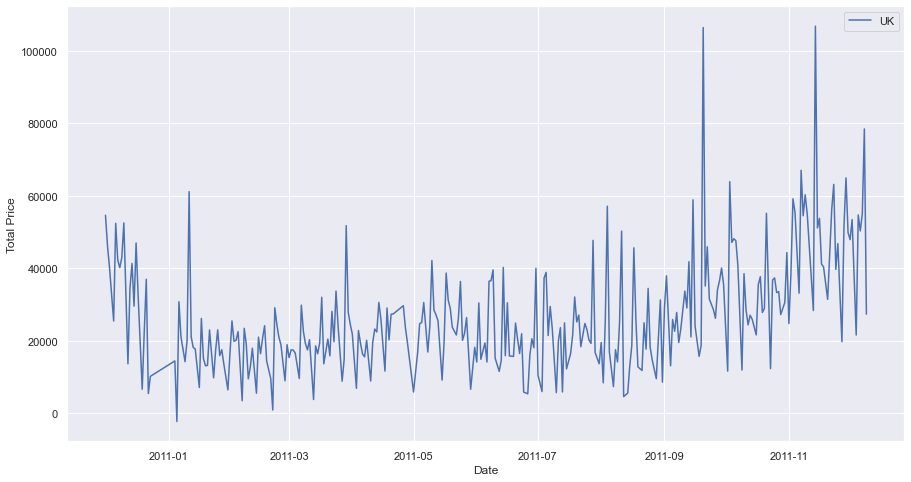

In [35]:
# Explore a single country
plt.figure(figsize=(15,8))
grouped_by_country[('Total Price','United Kingdom')][:-1].plot(label='UK')
plt.ylabel('Total Price')
plt.legend()

* Which is the evolution of revenues per product?

In [36]:
grouped_by_desc = pd.pivot_table(transactions,index=['Date'],columns=['Description'],values=['Total Price'],aggfunc=np.sum,fill_value=0,margins=True)
grouped_by_desc

Total Price                                 \
Description  4 PURPLE FLOCK DINNER CANDLES  50'S CHRISTMAS GIFT BAG LARGE   
Date                                                                        
2010-12-01                            5.10                           0.00   
2010-12-02                            0.00                           0.00   
2010-12-03                            0.00                           0.00   
2010-12-05                           30.60                           0.00   
2010-12-06                            0.00                           0.00   
...                                    ...                            ...   
2011-12-06                            0.79                           0.00   
2011-12-07                           18.96                           7.46   
2011-12-08                            9.48                           2.46   
2011-12-09                            0.00                          19.92   
All                                 290.80                        2341.13   

                                                             \
Description  DOLLY GIRL BEAKER  I LOVE LONDON MINI BACKPACK   
Date                                                          
2010-12-01                0.00                         0.00   
2010-12-02                0.00                         0.00   
2010-12-03                0.00                         0.00   
2010-12-05                0.00                         0.00   
2010-12-06                0.00                         0.00   
...                        ...                          ...   
2011-12-06                9.96                        16.60   
2011-12-07               15.00                        33.18   
2011-12-08               16.25                        24.89   
2011-12-09                2.46                        16.58   
All                    2882.50                      1628.17   

                                                                   \
Description  I LOVE LONDON MINI RUCKSACK  NINE DRAWER OFFICE TIDY   
Date                                                                
2010-12-01                          0.00                     0.00   
2010-12-02                          0.00                     0.00   
2010-12-03                          0.00                     0.00   
2010-12-05                          0.00                     0.00   
2010-12-06                          0.00                     0.00   
...                                  ...                      ...   
2011-12-06                          0.00                     0.00   
2011-12-07                          0.00                    14.95   
2011-12-08                          0.00                     0.00   
2011-12-09                          0.00                     0.00   
All                                 4.15                   909.37   

                                                                  \
Description  OVAL WALL MIRROR DIAMANTE   RED SPOT GIFT BAG LARGE   
Date                                                               
2010-12-01                         0.00                     0.00   
2010-12-02                         0.00                     0.00   
2010-12-03                        20.38                     0.00   
2010-12-05                         0.00                     0.00   
2010-12-06                         8.47                     0.00   
...                                 ...                      ...   
2011-12-06                         9.95                     7.50   
2011-12-07                         0.00                     0.00   
2011-12-08                        18.24                    32.50   
2011-12-09                         8.29                    15.00   
All                             2351.32                  2107.42   

                                                                      ...  \
Description  SET 2 TEA TOWELS I LOVE LONDON   SPACEBOY BABY GIFT SET  ..

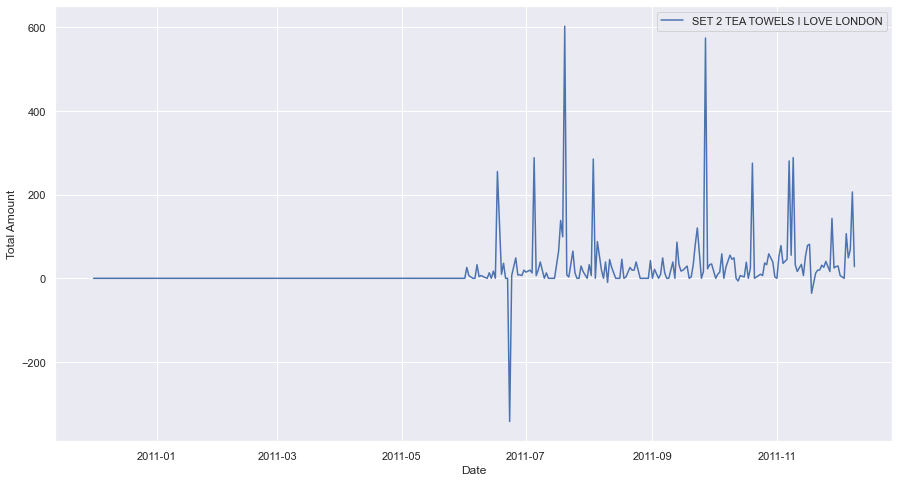

In [37]:
# Explore a single product
plt.figure(figsize=(15,8))
grouped_by_desc[('Total Price','SET 2 TEA TOWELS I LOVE LONDON ')][:-1].plot(label='SET 2 TEA TOWELS I LOVE LONDON')
plt.ylabel('Total Amount')
plt.legend()

Now, let's explore the transactions based on the time.

In [38]:
transactions['Hour'] = transactions.InvoiceDate.dt.hour

In [39]:
median_price_per_day_and_hour = pd.pivot_table(transactions,index=['Hour'],columns=['Day of Week'],values=['Total Price'],aggfunc=np.median,fill_value=0)
median_price_per_day_and_hour

Total Price                                         
Day of Week      Friday Monday Sunday Thursday Tuesday Wednesday
Hour                                                            
6                 0.000   0.00   0.00    -6.35   0.000      0.00
7                55.800  15.30   0.00    67.05  18.720     33.00
8                17.700  16.50   0.00    17.70  17.700     17.00
9                14.950  12.75  15.00    13.28  15.790     15.90
10               12.750  14.85  12.75    15.90  14.940     16.50
11                9.360  10.04   7.50    11.25  10.500     10.20
12               10.400  10.20   5.90    11.25   9.900      9.90
13               10.200   8.50   6.30    10.08   9.950     10.20
14               10.200   9.36   5.78    10.50   9.900     10.08
15                8.290   6.58   6.64     8.40   8.260      7.38
16                4.985   4.98   4.95     7.95   4.960      5.04
17                5.020   4.98   0.00    13.20   4.160      4.95
18             -176.000   4.13   0.00     7.46   4.255      0.00
19                2.500   0.00   0.00     5.04   0.000    160.00
20                2.950   0.00   0.00     4.35   0.000    747.88

Text(30.453124999999993, 0.5, 'Day of Week')

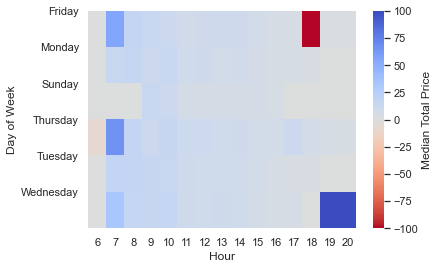

In [40]:
sns.heatmap(median_price_per_day_and_hour.T,cmap='coolwarm_r',vmin=-100,vmax=100,cbar_kws={'label': 'Median Total Price'})
plt.yticks(ticks = range(0,len(median_price_per_day_and_hour.T)),labels=['Friday','Monday','Sunday','Thursday','Tuesday','Wednesday'])
plt.ylabel('Day of Week')

* It seems that, on average, the highest amount of revenues are being observed on Wednesday at the afternoon.
* On the other hand, it seems that, on average, the highest cancellation amounts are being observed on Friday at the afternoon.

## Preprocess the data

Let's group the data and calculate the number of transactions and the average revenue per `Country` .

In [41]:
aggregated_df = transactions.groupby('Country').agg({'InvoiceNo':'count','Total Price': 'median'}).sort_values('Total Price', ascending=False)
aggregated_df.head()

,InvoiceNo,Total Price
Country,,
Netherlands,2371,91.80
Japan,358,61.20
Australia,1259,51.84
Lithuania,35,45.00
Singapore,229,34.80


In [42]:
aggregated_df.describe()

,InvoiceNo,Total Price
count,38.000000,38.000000
mean,14260.763158,23.340000
std,80207.474175,15.737483
min,10.000000,8.290000
25%,131.750000,16.600000
50%,373.500000,17.550000
75%,1215.750000,23.400000
max,495478.000000,91.800000


F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='InvoiceNo'>

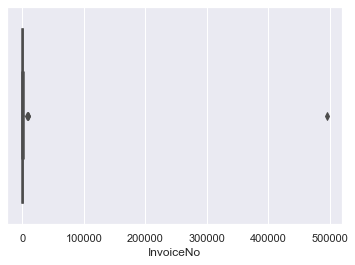

In [43]:
sns.boxplot(aggregated_df['InvoiceNo'])

F:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total Price'>

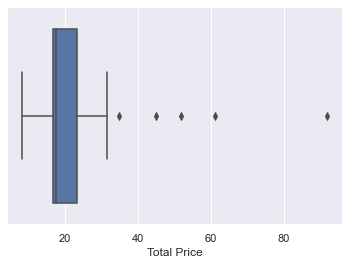

In [44]:
sns.boxplot(aggregated_df['Total Price'])

As we can see, there are some outliers.<br>
So we have to filter them out.

In [45]:
# For the 'InvoiceNo' column
iqr = aggregated_df['InvoiceNo'].quantile(0.75) - aggregated_df['InvoiceNo'].quantile(0.25)
min_val = aggregated_df['InvoiceNo'].quantile(0.25) - (1.5 * iqr)
max_val = aggregated_df['InvoiceNo'].quantile(0.75) + (1.5 * iqr)


In [46]:
# For the 'Total Price' column
iqr2 = aggregated_df['Total Price'].quantile(0.75) - aggregated_df['Total Price'].quantile(0.25)
min_val2 = aggregated_df['Total Price'].quantile(0.25) - (1.5 * iqr2)
max_val2 = aggregated_df['Total Price'].quantile(0.75) + (1.5 * iqr2)


Create a new dataframe with the *cleaned* data

In [47]:
x_cleaned = aggregated_df[(aggregated_df['InvoiceNo'] >= min_val) & (aggregated_df['InvoiceNo'] <= max_val) & (aggregated_df['Total Price'] >= min_val2) & (aggregated_df['Total Price'] <= max_val2)]
x_cleaned.head()

,InvoiceNo,Total Price
Country,,
Lebanon,45,31.6
Sweden,462,30.0
Bahrain,19,25.5
Czech Republic,30,25.3
Hong Kong,288,23.4


### Scale the data

In [48]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x_cleaned)

## Apply the K-Means Clustering 

In [49]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(x_scaled)

KMeans(n_clusters=3, random_state=0)

Text(0, 0.5, 'Average Total Price')

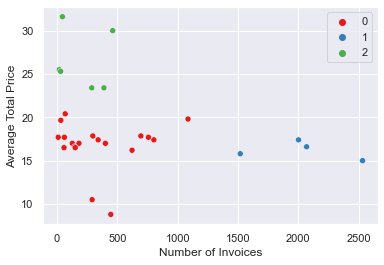

In [50]:
sns.scatterplot(x=x_cleaned['InvoiceNo'],y=x_cleaned['Total Price'],data=x_cleaned,hue=kmeans.labels_,palette='Set1')
plt.xlabel('Number of Invoices')
plt.ylabel('Average Total Price')

From the above visualization we can see that there are 3 different clusters:
* The first one (down left corner), corresponds to countries which, on average, spend small amounts of money and make relative small number of transactions.
* The second one (down right corner), corresponds to countries which, on average, spend small amounts of money but make a lot of transactions.
* The third one, (upper left corner), corresponds to countries which, on average, spend relative large amounts of money, but make small number of transactions.

## Conclusion

Overall, depending on the goal of the retail company, it can focus its efforts on one or more of the 3 clusters.